# Let's handle some real CURVES

In [46]:
%matplotlib inline
from pycbc.waveform import get_td_waveform
import pylab

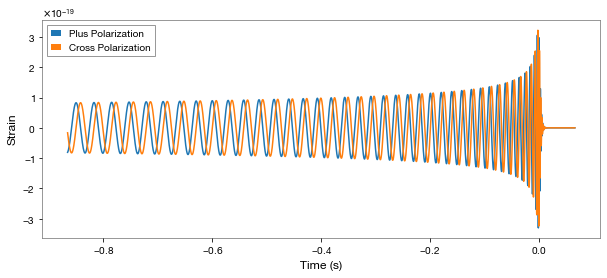

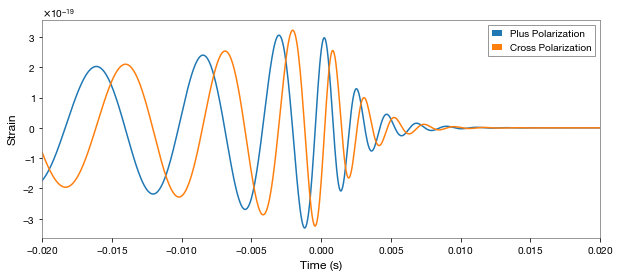

In [47]:
# The outputs of this function are the "plus" and "cross" polarizations 
# of the gravitational-wave signal as viewed from the line of sight at 
# a given source inclination (assumed face-on, i.e. zero inclination
# if not provided)
# Mass has a scale of Solar Mass 
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=25,
                         mass2=10,
                         delta_t=1.0/16384,
                         f_lower=30)

pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.legend()
pylab.grid()
pylab.show()

# Zoom in near the merger time
pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.xlim(-.02, .02)
pylab.legend()
pylab.grid()
pylab.show()

# delta_t : {None, <class 'float}
       # The time step used to generate the waveform (in s).
    # f_lower : {None, <class 'float}
       # The starting frequency of the waveform (in Hz).

We can see that in the this case, the two polarizations differ only by the phase of the signal. This is a known property of the signal, when the orbital plane of the binary does not precess (i.e. the individual black holes spins are aligned with the orbital angular momentum). In the zoom-in plot, we can see the merger itself and the ringdown that follows.

### How does the waveform change with the mass of the binary?

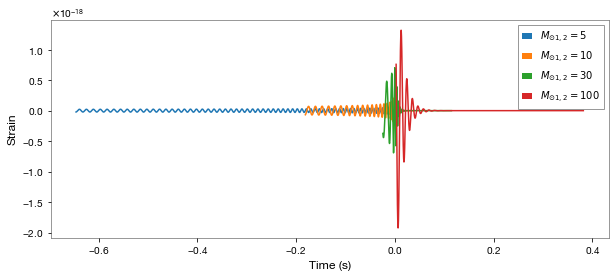

In [48]:
# Component mass of each binary component. We'll simplify here and assume that each 
# component of the binary has the same mass. Again, units are in solar masses.
pylab.figure(figsize=pylab.figaspect(0.4))
for m in [5, 10, 30, 100]:
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=m,
                         mass2=m,
                         delta_t=1.0/16384,
                         f_lower=70)
    
    pylab.plot(hp.sample_times, hp, label='$M_{\odot 1,2}=%s$' % m)
pylab.legend()
pylab.grid()
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.show()

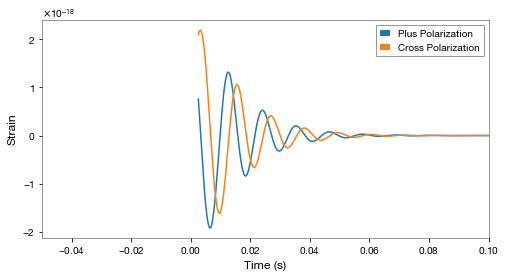

In [49]:
# Zoom in near the merger time
pylab.figure(figsize=pylab.figaspect(0.5))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.xlim(-0.05, .1)
pylab.legend()
pylab.grid()
pylab.show()


__The luminosity distance of the source is also a parameter when you generate a waveform. The units used are Megaparsecs (i.e. 10^6pc). Keep in mind that no redshift effects are taken into account here, so there is a simple linear relationship between distance and amplitude.__

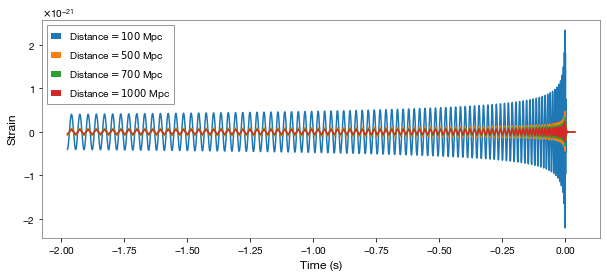

In [50]:
pylab.figure(figsize=pylab.figaspect(0.4))
for d in [100, 500,700 ,1000]:
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/4096,
                         f_lower=30,
                         distance=d)
    
    pylab.plot(hp.sample_times, hp, label='Distance$=%s$ Mpc' % d)
pylab.legend()
pylab.grid()
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.show()

# Conclusions:  
## 1} The length of the waveform increases for lower-mass binary mergers.  
## 2} Closer the obect, higher the frequency and lower wavelength.